# HW4 - Variational Inference


# Problem 1

 Use the EM implementation for Gaussian mixture models (GMM) in sklearn to segment the image Haiti\_Image.tif into four classes. Then answer the following questions
 
- Compare the classification results obtained with the GMM to those obtained from K-means (KM) segmentation of the same image. Again use four classes for KM. Show the results of the two approaches to segmentation as images with the separate classes shown in different colors. Comment on the similarities and differences in the two segmentations.
- Write the equation for the posterior prediction of the probability of the class label for each data  points in the image.
- Show four separate images, one for each class, that color code the probabilities of a class label for each data point in the image. Comment on the insights provided by this probabilistic view of the segmentation. Very briefly describe example of how this probabilistic perspective might be used by governmental or non-profit agencies concerned with improving the environment or the living conditions in Haiti. 

### GMM vs. K-means

Compare the classification results obtained with the GMM to those obtained from K-means (KM) segmentation of the same image. Again use four classes for KM. Show the results of the two approaches to segmentation as images with the separate classes shown in different colors. Comment on the similarities and differences in the two segmentations.

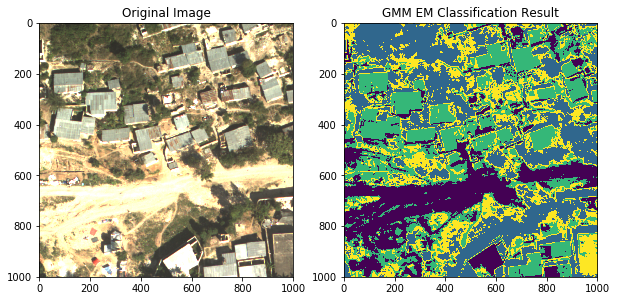

In [3]:

from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# read the image and convert to numpy array
path = "/Users/donaldbrown/Dropbox/department/Classes/Data/Images/"
# The Haiti image
FILENAME1 = 'Haiti_Image.tif'
im = Image.open(path+FILENAME1)
imArray = np.array(im)
nrows, ncols, nbands = np.shape(imArray)

# reshape the image array to num_observations by num_features (1,000,000 by 3)
X = np.reshape(imArray,[nrows*ncols,nbands])

# Create and train our Gaussian Mixture Expectation Maximization Model
model = GaussianMixture(n_components=4, tol=0.1)
model.fit(X)
# predict latent variables - class labels
yhat = model.predict(X)

# reshape the result into an image
GMM_image = np.reshape(yhat,[nrows,ncols])

# plot the output, including the BIC in the title
plt.figure(figsize = (10,8))
#plt.suptitle('Unsupervised EM Classification, BIC = '+"{:e}".format(model.bic(X)))
plt.subplot(121)
plt.imshow(imArray)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(GMM_image)
plt.title('GMM EM Classification Result')
plt.show()

### Equation for the posterior prediction of the probability of the class label for each data points in the image.
Since GMM is a probabilistic model, it provides much more than labels. It also gives the posterior probabilisity of the cluster or class assignment for each pixel in the image, specifically

$P(k|x_n, \Theta,P(k)) = \frac{P(x_n| \theta_k)P(k)} {\sum_{j=1}^K P(j|x_n, \theta_j)P(j)}$



for $k = 1,\ldots,K$ and $K$ is the number of clusters

### Separate images, one for each class, that color code the probabilities of a class label

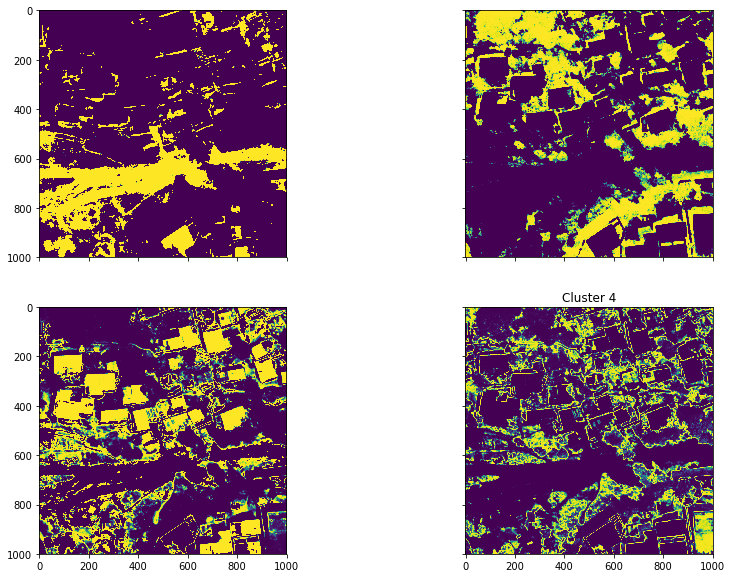

In [4]:
# Plots for each of the 4 classes

pred_probs = model.predict_proba(X)

# reshape the result into an image
Cluster = list()
for i in range(4):
    Cluster.append(np.reshape(pred_probs[:,i],[nrows,ncols]))

# plot the output, including the BIC in the title
fig, axs = plt.subplots(2,2, figsize = (14,10),sharex = True, sharey = True)
axs[0,0].imshow(Cluster[0])
plt.title('Cluster 1')
axs[0,1].imshow(Cluster[1])
plt.title('Cluster 2')
axs[1,0].imshow(Cluster[2])
plt.title('Cluster 3')
axs[1,1].imshow(Cluster[3])
plt.title('Cluster 4')
plt.show()

## Problem 2

Explain how the Evidential Lower Bound (ELBO) has components that trade-off between bias and variance.  

### Minimizing KL using the ELBO

Minimizing KL is equivalent to maximizing the Evidence Lower BOund (ELBO):

$\mathbb{KL}(\color{purple}{q(\theta)} \parallel \color{red}{p(\theta\ |\ \mathcal{D})}) = -(\underbrace{\mathbb{E}_q(\log \color{blue}{p(\mathcal{D}, \theta))} - \mathbb{E}_q(\color{purple}{\log q(\theta)})}_{\color{orange}{\textrm{ELBO}}}) - \log \color{green}{p(\mathcal{D})}$

The first term in the ELBO, $\mathbb{E}_q(\log \color{blue}{p(\mathcal{D}, \theta))}$, is the expected log likelihood of the data, $\mathcal{D}$ and the latent variables and parameters, $\theta$. The expectation and maximization are with respect to $q(\theta)$ and this will mean that this approximating distribution will be pushed as close as possible to the maximum likelihood solution of the data. Hence, it will have low variance and high bias. In contast the second term in the ELBO, $ - \mathbb{E}_q(\color{purple}{\log q(\theta)})$, is the entropy of $q(\theta)$. Maximizing the entropy increases the variance and reduces the bias. Thus, both terms work together to trade-off bias and variance.

# Problem 3

Provide displays that illustrate variational approximation for the following two examples.

Suppose we have a two dimensional Gaussian with an arbitrary mean, $\mu$, and with a variance-covariance matrix with $\sigma_{11} = 1.0,   \sigma_{22} = \sqrt{0.5}$, and the correlation, $\rho = 0.75$ Show the variational approximation that minimizes the Kullback-Liebler divergence with this Gaussian using the mean field assumption. Explain the shape of this approximation.

In [5]:
# For reproducibility

SEED = 12345 

np.random.seed(SEED)

### Variational Inference Example
Find the Gaussian with uncorrelated variables that minimizes the Kullback-Leibler divergence with a full-rank covariance Gaussian distribution.

We will approximate the target Gaussian with one that minimizes the ELBO with mean field assumptions so that the variables (e.g., parameters or $\theta$) are uncorrelated.

$q(\theta) = \left\{\left.N\left(\begin{pmatrix} \mu_{\theta_1} \\ \mu_{\theta_2} \end{pmatrix},
                              \begin{pmatrix} \sigma_{\theta_1}^2 & 0 \\ 0 & \sigma_{\theta_2}^2\end{pmatrix}\ \right|\ 
                       \mu_{\theta_1}, \mu_{\theta_2} \in \mathbb{R}^2, \sigma_{\theta_1}, \sigma_{\theta_2} > 0\right)\right\}$
                       
For these Gaussian the Kullback-Lieber divergence is given by 

$D_{KL}(q||p) = \frac{1}{2}\left[\log\frac{|\Sigma_p|}{|\Sigma_q|} - k + (\boldsymbol{\mu_q}-\boldsymbol{\mu_p})^T\Sigma_p^{-1}(\boldsymbol{\mu_q}-\boldsymbol{\mu_p}) + tr\left\{\Sigma_p^{-1}\Sigma_q\right\}\right]$

### Mean field Assumption
Assumes the variational distribution factors can be decomposed into independent components. So, $q(\theta_1, \ldots, \theta_n) = q(\theta_1) \cdots q(\theta_n)$

With this assumption the variational approximation can be found by coordinate ascent (like Gibbs, except optimization not sampling). 

Let 
$q_{-i}(\boldsymbol{\theta})
    = q(\theta_1) \cdots q(\theta_{i - 1})\ q(\theta_{i + 1}) \cdots q(\theta_n)$

Then

$\begin{align*}
q(\theta_i)
    & \propto \exp\left(\mathbb{E}_{q_{-i}}(\log(\mathcal{D}, \boldsymbol{\theta}))\right)
\end{align*}$


Suppose suppose the target distibution is a two dimensional Gaussian with an arbitrary mean, $\mu$, and with a variance-covariance matrix with $\sigma_{11} = 1.0,   \sigma_{22} = \sqrt{0.5}$, and the correlation, $\rho = 0.75$ Show the variational approximation that minimizes the Kullback-Liebler divergence with this Gaussian using the mean field assumption. Explain the shape of this approximation.

In [8]:
from matplotlib.patches import Ellipse


SIGMA_theta1 = 1.
SIGMA_theta2 = np.sqrt(0.5)
CORR_COEF = 0.75

true_cov = np.array([[SIGMA_theta1**2, CORR_COEF * SIGMA_theta1 * SIGMA_theta2],
                     [CORR_COEF * SIGMA_theta1 * SIGMA_theta2, SIGMA_theta2**2]])
true_precision = np.linalg.inv(true_cov)

approx_sigma_theta1, approx_sigma_theta2 = 1. / np.sqrt(np.diag(true_precision))

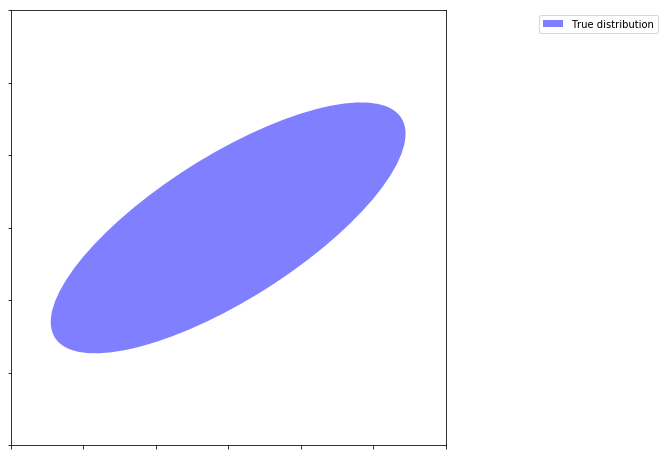

In [9]:
fig, ax  = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal');


var, U = np.linalg.eig(true_cov)
angle = 180. / np.pi * np.arccos(np.abs(U[0, 0]))

e = Ellipse(np.zeros(2), 2 * np.sqrt(5.991 * var[0]), 2 * np.sqrt(5.991 * var[1]), angle=angle)
e.set_alpha(0.5)
e.set_facecolor('blue')
e.set_zorder(10);
ax.add_artist(e);

ax.set_xlim(-3, 3);
ax.set_xticklabels([]);

ax.set_ylim(-3, 3);
ax.set_yticklabels([]);

rect = plt.Rectangle((0, 0), 1, 1, fc='blue', alpha=0.5)
ax.legend([rect],
          ['True distribution'],
          bbox_to_anchor=(1.5, 1.));

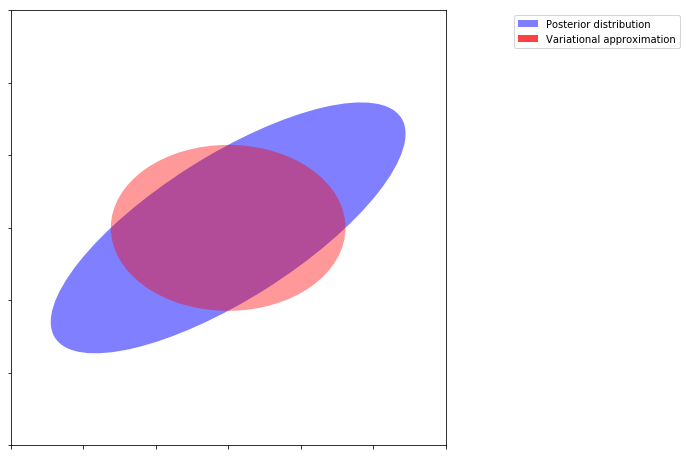

In [11]:
# Find the appoximating Gaussian with uncorrelated variables

vi_e = Ellipse(np.zeros(2), 2 * np.sqrt(5.991) * approx_sigma_theta1, 2 * np.sqrt(5.991) * approx_sigma_theta2)
vi_e.set_alpha(0.4)
vi_e.set_facecolor('red')
vi_e.set_zorder(11);
ax.add_artist(vi_e);

vi_rect = plt.Rectangle((0, 0), 1, 1, fc='red', alpha=0.75)

ax.legend([rect, vi_rect],
          ['Posterior distribution',
           'Variational approximation'],
          bbox_to_anchor=(1.55, 1.));
fig

Suppose we have the following results from   tests of infections in the sore throats of our patients: $\{0, 1, 0,  1, 1,  0, 0, 0, 0, 0\}$, where $1$ indicates an infection  and $0$ indicates no infection. We assume a uniform prior for the probability of infection. Show the plot of the true posterior and use the ADVI optimization to obtain the variational approximation of the posterior. Overlay the plot of this approximation on the true posterior.

In [12]:
# Enter the data
x_beta_binomial = np.array([0,1,0,1,1,0,0,0,0,0])

In [32]:
# Create the model

import pymc3 as pm
import scipy as sp
import pandas as pd
import seaborn as sns
import scipy.stats as st

with pm.Model() as beta_binomial_model:
    p_beta_binomial = pm.Uniform('p', 0., 1.)
    x_obs = pm.Bernoulli('x', p_beta_binomial,
                         observed=x_beta_binomial)

### Transforming the Beta for Variational Inference

The optimization method we will use requires an unconstrained distribution. The Beta distribution is contrained so we will transform it.

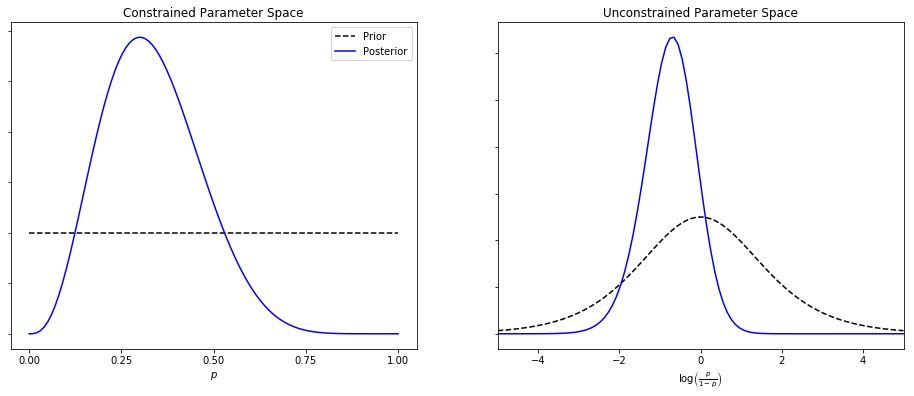

In [17]:
# plot the transformed (unconstrained) parameters
fig, (const_ax, trans_ax) = plt.subplots(ncols=2, figsize=(16, 6))

prior = sp.stats.uniform(0, 1)
posterior = sp.stats.beta(1 + x_beta_binomial.sum(),
                          1 + (1 - x_beta_binomial).sum())

# constrained distribution plots
const_x = np.linspace(0, 1, 100)
const_ax.plot(const_x, prior.pdf(const_x),
              '--', c='k', label='Prior');

def logit_trans_pdf(pdf, x):
    x_logit = sp.special.logit(x)
    return pdf(x_logit) / (x * (1 - x))

const_ax.plot(const_x, posterior.pdf(const_x),
              c='blue', label='Posterior');

const_ax.set_xticks(np.linspace(0, 1, 5));
const_ax.set_xlabel(r'$p$');
const_ax.set_yticklabels([]);
const_ax.set_title('Constrained Parameter Space');
const_ax.legend(loc=1);

# unconstrained distribution plots
def expit_trans_pdf(pdf, x):
    x_expit = sp.special.expit(x)
    return pdf(x_expit) * x_expit * (1 - x_expit)

trans_x = np.linspace(-5, 5, 100)
trans_ax.plot(trans_x, expit_trans_pdf(prior.pdf, trans_x),
              '--', c='k');
trans_ax.plot(trans_x, expit_trans_pdf(posterior.pdf, trans_x),
              c='blue');

trans_ax.set_xlim(trans_x.min(), trans_x.max());
trans_ax.set_xlabel(r'$\log\left(\frac{p}{1 - p}\right)$');
trans_ax.set_yticklabels([]);
trans_ax.set_title('Unconstrained Parameter Space');

## Automating Variational Inference in Python

Maximize ELBO using gradient ascent instead of coordinate ascent
Tensor libraries calculate ELBO gradients automatically. PYMC3 uses the tensor library Theano. 

### Automatic Differentiation Variational Inference (__[ADVI](https://arxiv.org/abs/1603.00788)__)

- Only applicable to differentiable probability models
- Transform constrained parameters to be unconstrained
- Approximate the posterior for unconstrained parameters with mean field Gaussian

In [18]:
# Obtain the variational approximation to the beta

with beta_binomial_model:
    approx = pm.fit(50000, method = 'advi', random_seed = SEED)

Finished [100%]: Average Loss = 7.1941


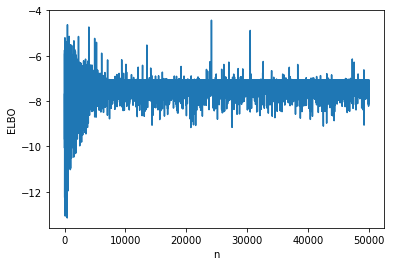

In [23]:
advi_elbo = pd.DataFrame(
    {'ELBO': -approx.hist,
     'n': np.arange(approx.hist.shape[0])})

_ = sns.lineplot(y='ELBO', x='n', data=advi_elbo)

# Can also use - 
# plt.plot(approx.hist);

In [24]:
# The approximation parameters

advi_bb_mu = approx.mean.eval()
advi_bb_std = approx.std.eval()
advi_bb_dist = sp.stats.norm(advi_bb_mu, advi_bb_std)

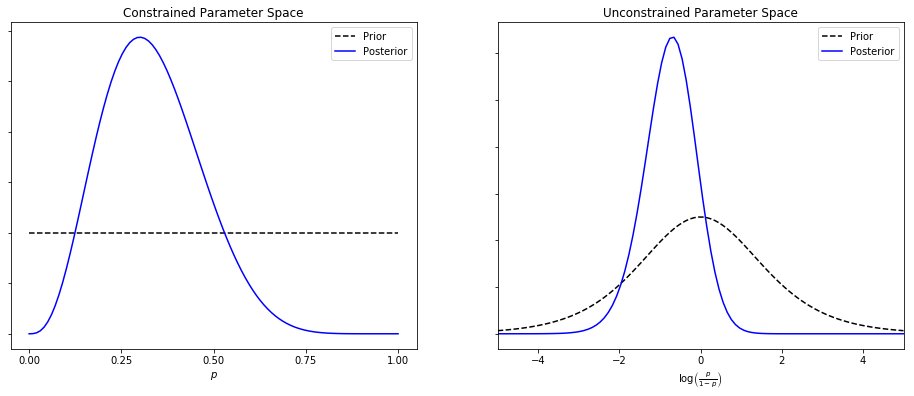

In [25]:

# plot the transformed (unconstrained) parameters
fig, (const_ax, trans_ax) = plt.subplots(ncols=2, figsize=(16, 6))

prior = sp.stats.uniform(0, 1)
posterior = sp.stats.beta(1 + x_beta_binomial.sum(),
                          1 + (1 - x_beta_binomial).sum())

# constrained distribution plots
const_x = np.linspace(0, 1, 100)
const_ax.plot(const_x, prior.pdf(const_x),
              '--', c='k', label='Prior');

def logit_trans_pdf(pdf, x):
    x_logit = sp.special.logit(x)
    return pdf(x_logit) / (x * (1 - x))

const_ax.plot(const_x, posterior.pdf(const_x),
              c='blue', label='Posterior');

const_ax.set_xticks(np.linspace(0, 1, 5));
const_ax.set_xlabel(r'$p$');
const_ax.set_yticklabels([]);
const_ax.set_title('Constrained Parameter Space');
const_ax.legend(loc=1);

# unconstrained distribution plots
def expit_trans_pdf(pdf, x):
    x_expit = sp.special.expit(x)
    return pdf(x_expit) * x_expit * (1 - x_expit)

trans_x = np.linspace(-5, 5, 100)
trans_ax.plot(trans_x, expit_trans_pdf(prior.pdf, trans_x),
              '--', c='k', label = "Prior");
trans_ax.plot(trans_x, expit_trans_pdf(posterior.pdf, trans_x),
              c='blue', label = "Posterior");

trans_ax.set_xlim(trans_x.min(), trans_x.max());
trans_ax.set_xlabel(r'$\log\left(\frac{p}{1 - p}\right)$');
trans_ax.set_yticklabels([]);
trans_ax.set_title('Unconstrained Parameter Space');
trans_ax.legend(loc=1);

# plot the ADVI gaussian approximation to the unconstrained posterior
#trans_ax.plot(trans_x, advi_bb_dist.pdf(trans_x),
#              c='red', label='Variational approximation');
#fig

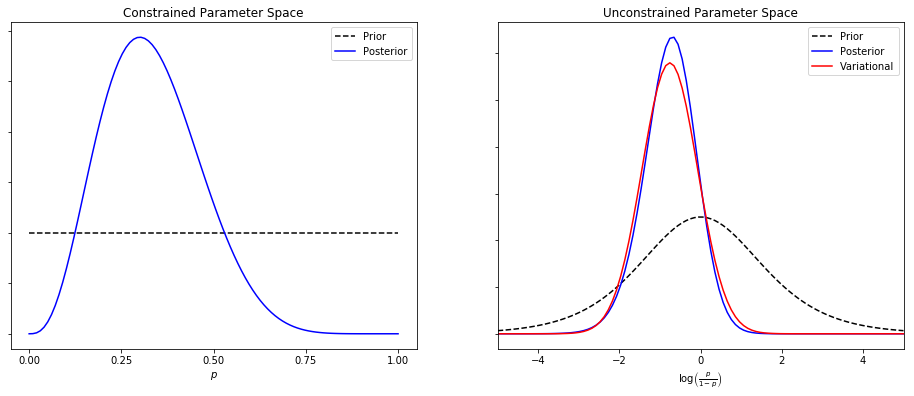

In [26]:
# plot the ADVI gaussian approximation to the unconstrained posterior
trans_ax.plot(trans_x, advi_bb_dist.pdf(trans_x),
              c='red', label='Variational');
trans_ax.legend(loc=1);

fig

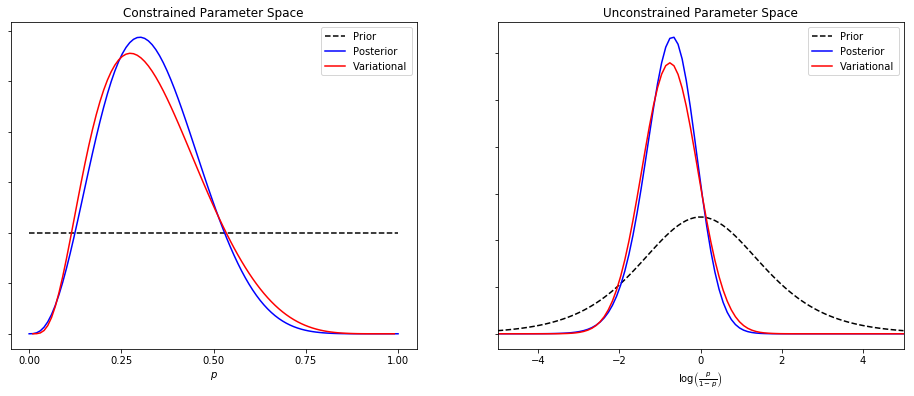

In [27]:
# plot the ADVI approximation to the true posterior
const_ax.plot(const_x, logit_trans_pdf(advi_bb_dist.pdf, const_x),
              c='red', label='Variational');
const_ax.legend(loc = 1)
fig

 (+3 extra credit) Show the Laplace approximation of the posterior and briefly comment on the visible  differences with the variational approximation

In [28]:
# Find the Laplace approximation

with pm.Model() as normal_aproximation:
    p = pm.Beta('p', 1., 1.)
    w = pm.Binomial('w',n=1, p=p, observed=x_beta_binomial)
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
mean_q['p'], std_q

(array(0.29999954), array([0.14491364]))

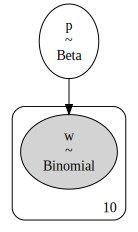

In [29]:
# Graphically display the model used for Laplace approximation
pm.model_to_graphviz(normal_aproximation)

In [30]:
# Run Laplace approximation
with pm.Model() as normal_aproximation:
    p = pm.Beta('p', 1., 1.)
    w = pm.Binomial('w',n=1, p=p, observed=x_beta_binomial)
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
mean_q['p'], std_q

(array(0.29999954), array([0.14491364]))

In [34]:
# For comparison, run HMC sampling
with pm.Model() as beta_binomial_model2:
    p_beta_binomial = pm.Uniform('p', 0., 1.)

with beta_binomial_model2:
    x_obs = pm.Bernoulli('x', p_beta_binomial,
                         observed=x_beta_binomial)
    
with beta_binomial_model2:
    trace_bb = pm.sample(50000, cores=8)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [p]


Sampling 8 chains for 1_000 tune and 50_000 draw iterations (8_000 + 400_000 draws total) took 82 seconds.
The acceptance probability does not match the target. It is 0.8989970857928712, but should be close to 0.8. Try to increase the number of tuning steps.


/Users/donaldbrown/opt/anaconda3/envs/Bayes/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


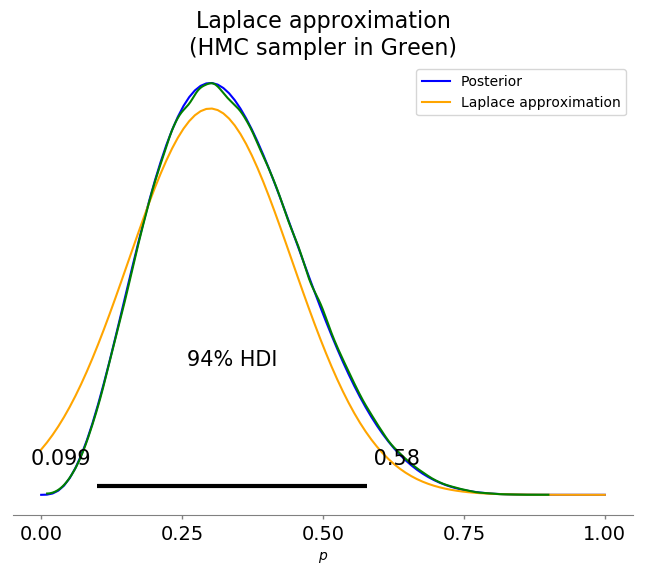

In [35]:
####################################################################################
# Plot for Laplace approximation results
####################################################################################
# plot the transformed (unconstrained) parameters
fig, (const_ax) = plt.subplots(ncols=1, figsize=(8, 6), dpi=100)
const_x = np.linspace(0, 1, 100)

posterior = sp.stats.beta(1 + x_beta_binomial.sum(),
                          1 + (1 - x_beta_binomial).sum())

# Plot the true posterior
const_ax.plot(const_x, posterior.pdf(const_x),
              c='blue', label='Posterior');

# plot the Laplace approximation to the constrained posterior
const_ax.plot(const_x, st.norm.pdf(const_x, mean_q['p'], std_q), color='orange', label='Laplace approximation')

pm.plot_posterior(trace_bb, point_estimate=None, credible_interval=None, ax=const_ax, color='green')

const_ax.legend(loc=1)
plt.title("Laplace approximation\n(HMC sampler in Green)", fontsize=16)

const_ax.set_xticks(np.linspace(0, 1, 5));
const_ax.set_xlabel(r'$p$');
const_ax.set_yticklabels([]);
plt.show()

# Problem 4

With the CHD data set (CHDdata.csv ) from the previous two homework assignments develop a variational inference  estimate using ADVI optimization for the posterior distributions of the parameters in a main effects logistic regression model. Use all predictor variables in the data set and standardize all of the numeric, continuous predictors using the mean and standard deviation. For each of the parameters in the regression use a Gaussian prior with a mean vector of $\textbf{0}$ and the identity matrix as the variance-covariance matrix. Show the ELBO plot from the optimization and discuss how it looks. Use plots to discuss the marginals for each of the regression model parameters obtained from variational inference and compare them to the ones you obtained using sampling.


In [36]:
# Load the data

path = "/Users/donaldbrown/Dropbox/department/Classes/Data/"
file = "CHDdata.csv"
data = pd.read_csv(path+file)

# Numeric predictors
numeric_predictors = ["sbp","tobacco","ldl","adiposity","typea","obesity","alcohol","age"]
n = data.shape[0]

# Numeric, categorical predictors and response, y`

x_num = data[numeric_predictors]
x_cat = data['famhist']
y = data['chd']

all_predictors = numeric_predictors
all_predictors.append('famhist')

# No. of predictors
k = len(all_predictors)

# Standardize numeric columns, to mean 0 variance 1
mean = x_num.mean()
std = x_num.std()
x_num = np.array((x_num - mean) / std)

# Convert categorical predictor column to a dummy variable
# + 0 forces numeric type
x_cat = np.array(data['famhist'] == 'Present').reshape((n,1))

# Put them into one data matrix

X = np.concatenate((x_num, x_cat), axis = 1)

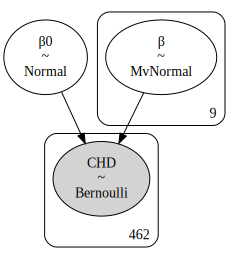

In [40]:
# Show the graphical representation

with pm.Model() as advi_model:
    
    # Intercept term
    β0 = pm.Normal('β0', mu=0, sd=1)
    
    # Beta coefficients for predictor variables
    β = pm.MvNormal('β', mu=np.zeros(k), cov=np.eye(k), shape=k)
    
    # Calculate logit from the normal variables, and add itercept
    logit = pm.math.dot(X,β) + β0

    # Pass the logits to a Bernoulli outcome, with the observed data
    y_pred = pm.Bernoulli('CHD', logit_p=logit, observed=y)

pm.model_to_graphviz(advi_model)

In [41]:
# Obtain the variational fit

with advi_model:

    # Variational inference with ADVI optimization
    advi_fit = pm.fit(50000, method='advi')

Finished [100%]: Average Loss = 259.24


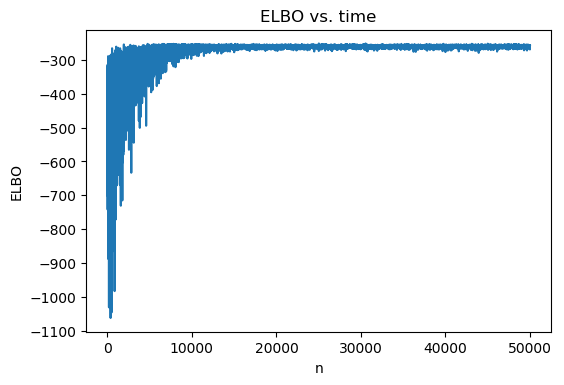

In [42]:
# plot the ELBO vs. fitting time or iterations (n)

advi_elbo = pd.DataFrame(
    {'ELBO': -advi_fit.hist,
     'n': np.arange(advi_fit.hist.shape[0])})

plt.figure(dpi=100)
ax = sns.lineplot(y='ELBO', x='n', data=advi_elbo)
ax.set_title("ELBO vs. time")
plt.show()

### Comments on ELBO plot (problem 4)

The evidence lower bound (ELBO) increases steadily until converging to a maximum, slightly above $\mathrm{ELBO}=-300$.  This visually shows the maximization implemented in the ADVI algorithms, which seeks to maximize the ELBO.

In [43]:
# sample from the variational posterior distribution
PPC_SAMPLES = 5000
advi_trace = advi_fit.sample(PPC_SAMPLES)

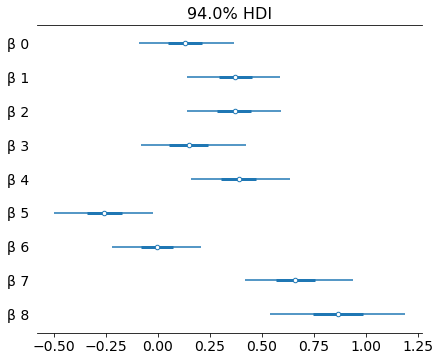

In [44]:
# Forest Plots to show the distributions for each of the predictors

with advi_model:
    pm.forestplot(advi_trace, var_names=['β'])

In [45]:
# Get the sampling results for comparison

with pm.Model() as sampling_model: 
    
    # Intercept term
    β0 = pm.Normal('β0', mu=0, sd=1)
    
    # Beta coefficients for predictor variables
    β = pm.MvNormal('β', mu=np.zeros(k), cov=np.eye(k), shape=k)
    
    # Calculate logit from the normal variables, and add itercept
    logit = pm.math.dot(X,β) + β0

    # Pass the logits to a Bernoulli outcome, with the observed data
    y_pred = pm.Bernoulli('CHD', logit_p=logit, observed=y)

    # Sample
    trace_main = pm.sample(10000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, β0]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 38 seconds.


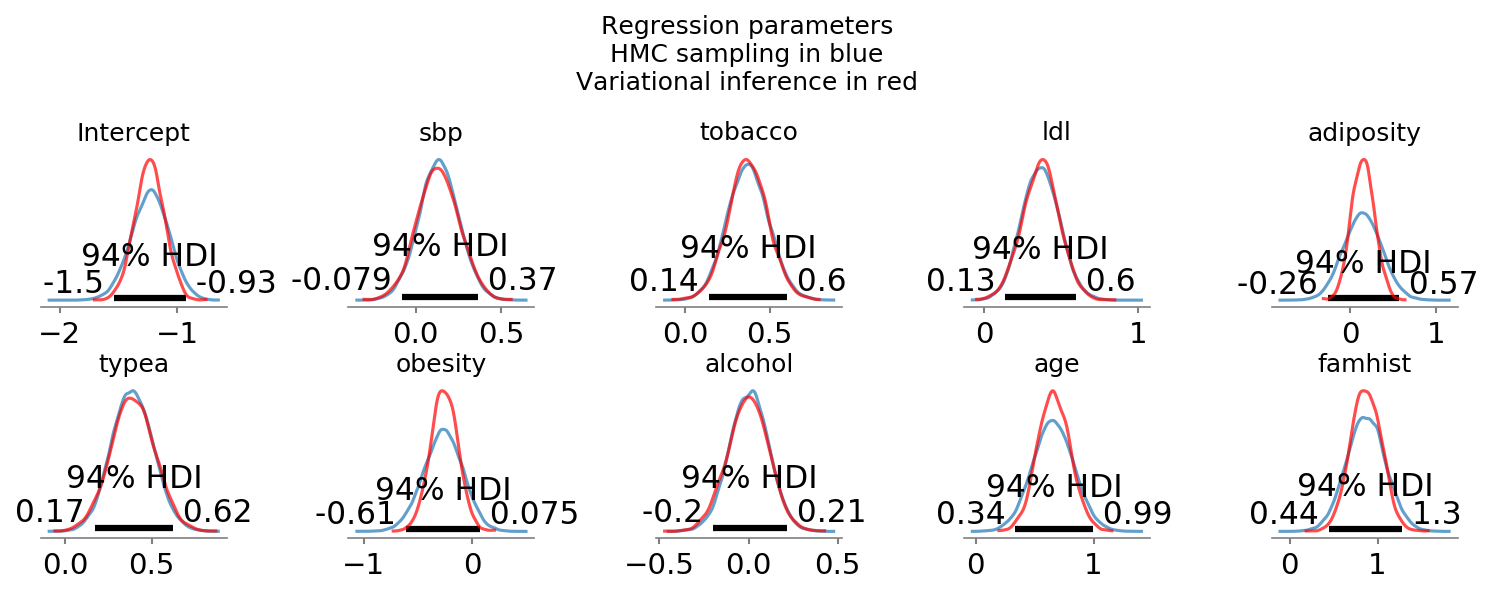

In [46]:
burnin = 100
sample_intercept = trace_main['β0'][burnin:]
sample_betas = trace_main['β'][burnin:]
advi_intercept = advi_trace['β0']
advi_betas = advi_trace['β']

# Plot posteriors

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4), dpi=150, constrained_layout=False)

for ax, estimate_sampling, estimate_advi, title, xlabel in zip(axes.ravel(),
                               [sample_intercept] + [sample_betas[:,i] for i in range(k)],
                               [advi_intercept] + [advi_betas[:,i] for i in range(k)],
                               ['Intercept'] + numeric_predictors + ['famhist'],
                               ['Intercept'] + numeric_predictors + ['famhist']):
    
    pm.plot_posterior(estimate_sampling, ax=ax,point_estimate=None,  alpha=0.7)
    pm.plot_posterior(estimate_advi, ax=ax, color='red', point_estimate=None, hdi_prob= 'hide', alpha=0.7)
    
    ax.set_title(title, fontsize=12)

    #ax.set_xlabel(xlabel, fontsize=12)

plt.suptitle("Regression parameters\nHMC sampling in blue\nVariational inference in red")
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()

### Comments on the sampling and variational plots of the posterior distributions of the parameters (problem 4)

These plots show that the variational posterior estimates are very close to the sampling posterior distributions for most parameters. The only slight differences are for obesity and adiposity (both highly correlated); age and family history (the categorical variable). However, the differences are that the variational approach has smaller credible intervals than the sampling approach. This is concerning since it implies greater certainty than the data support. In general, the two methods are close and the variational approach provides a faster and more scalable implementation.


# Problem 5

With the data set bangladesh.csv develop a partial-pooled model for all districts to predict contraception usage. Do not use any other predictor variable besides district.  Use variational inference with ADVI optimization to develop estimates of the proportions of women using contraception in each district. Plot each of these estimates by district. Compare your results with those you obtained using sampling.

In [49]:
# Read data

path = "/Users/donaldbrown/Dropbox/department/Classes/Data/"
file = "bangladesh.csv"

data = pd.read_csv(path + file)
district = data['district']
contraception = data['use.contraception']

levels  = district.unique()
nlevels = district.nunique()

# One-hot-encode the data
X = np.zeros(shape = (data.shape[0], nlevels))
for i, dis in enumerate(levels):
    X[:, i] = (district == dis)

In [50]:
# Set up partial pooling model
with pm.Model() as partial_pooling:

    # Priors
    mu_a = pm.Normal('mu_a', mu=0., sd=1e5)
    sigma_a = pm.HalfCauchy('sigma_a', 5)

    # Random intercepts
    a = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=nlevels)
    
    # Expected value
    y_hat = pm.math.dot(a, X.T)

    # Data likelihood
    y_like = pm.Bernoulli('y_like', logit_p=y_hat, observed=contraception)

    # Run sampling
    trace_pp = pm.sample(10000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, sigma_a, mu_a]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 56 seconds.


In [51]:
# Set up partial pooling model
with pm.Model() as partial_pooling2:

    # Priors
    mu_a = pm.Normal('mu_a', mu=0., sd=1e5)
    sigma_a = pm.HalfCauchy('sigma_a', 5)

    # Random intercepts
    a = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=nlevels)
    
    # Expected value
    y_hat = pm.math.dot(a, X.T)

    # Data likelihood
    y_like = pm.Bernoulli('y_like', logit_p=y_hat, observed=contraception)

    # Variational inference with ADVI optimization
    advi_fit_pp = pm.fit(50000, method='advi')

Finished [100%]: Average Loss = 1,286.1


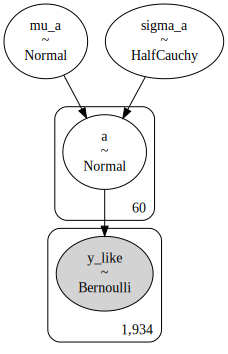

In [52]:
# Graphically display the model used for both 
# - HMC sampling
# - variational inference with ADVI optimization
# The two models are in different variables, but structured identically. See above code.
pm.model_to_graphviz(partial_pooling)

In [53]:
# sample from the variational posterior distribution
PPC_SAMPLES = 5000
advi_trace_pp = advi_fit_pp.sample(PPC_SAMPLES)

/Users/donaldbrown/opt/anaconda3/envs/Bayes/lib/python3.7/site-packages/pymc3/plots/__init__.py:35: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
/Users/donaldbrown/opt/anaconda3/envs/Bayes/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f92e8c54128>],
      dtype=object)

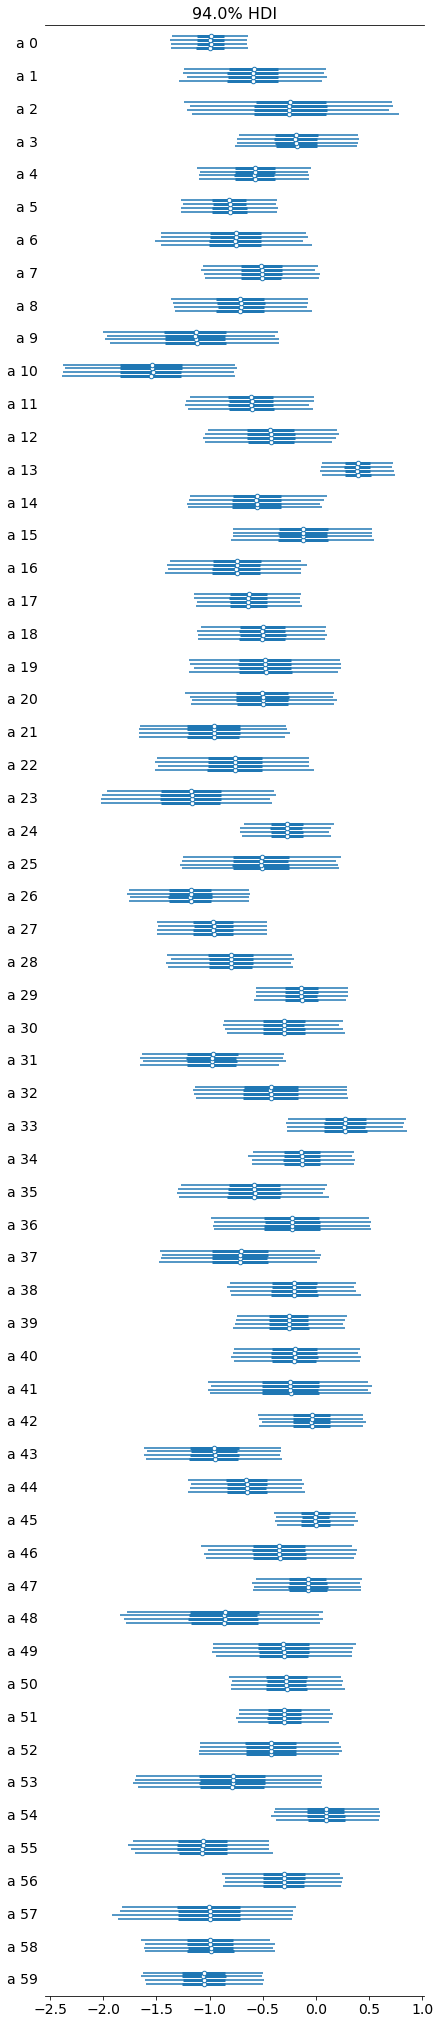

In [54]:
# Forest plots (logit, not probabilities):
# HMC sampling
pm.forestplot(trace_pp, varnames=['a'])

/Users/donaldbrown/opt/anaconda3/envs/Bayes/lib/python3.7/site-packages/pymc3/plots/__init__.py:35: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
/Users/donaldbrown/opt/anaconda3/envs/Bayes/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f92bcfc5cc0>],
      dtype=object)

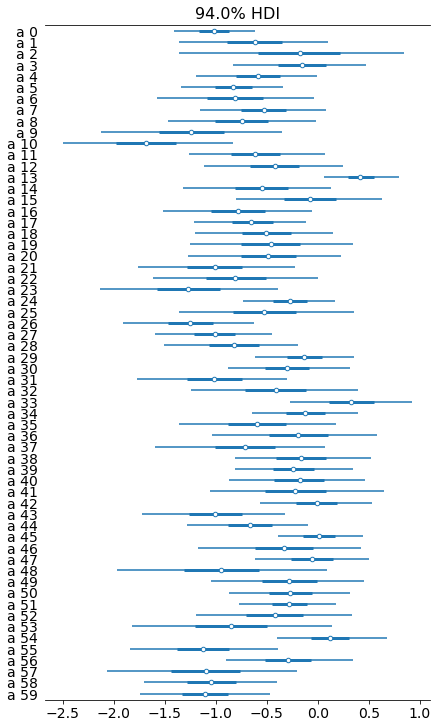

In [55]:
# Forest plots (logit, not probabilities):
# Variational inference with ADVI
pm.forestplot(advi_trace_pp, varnames=['a'])

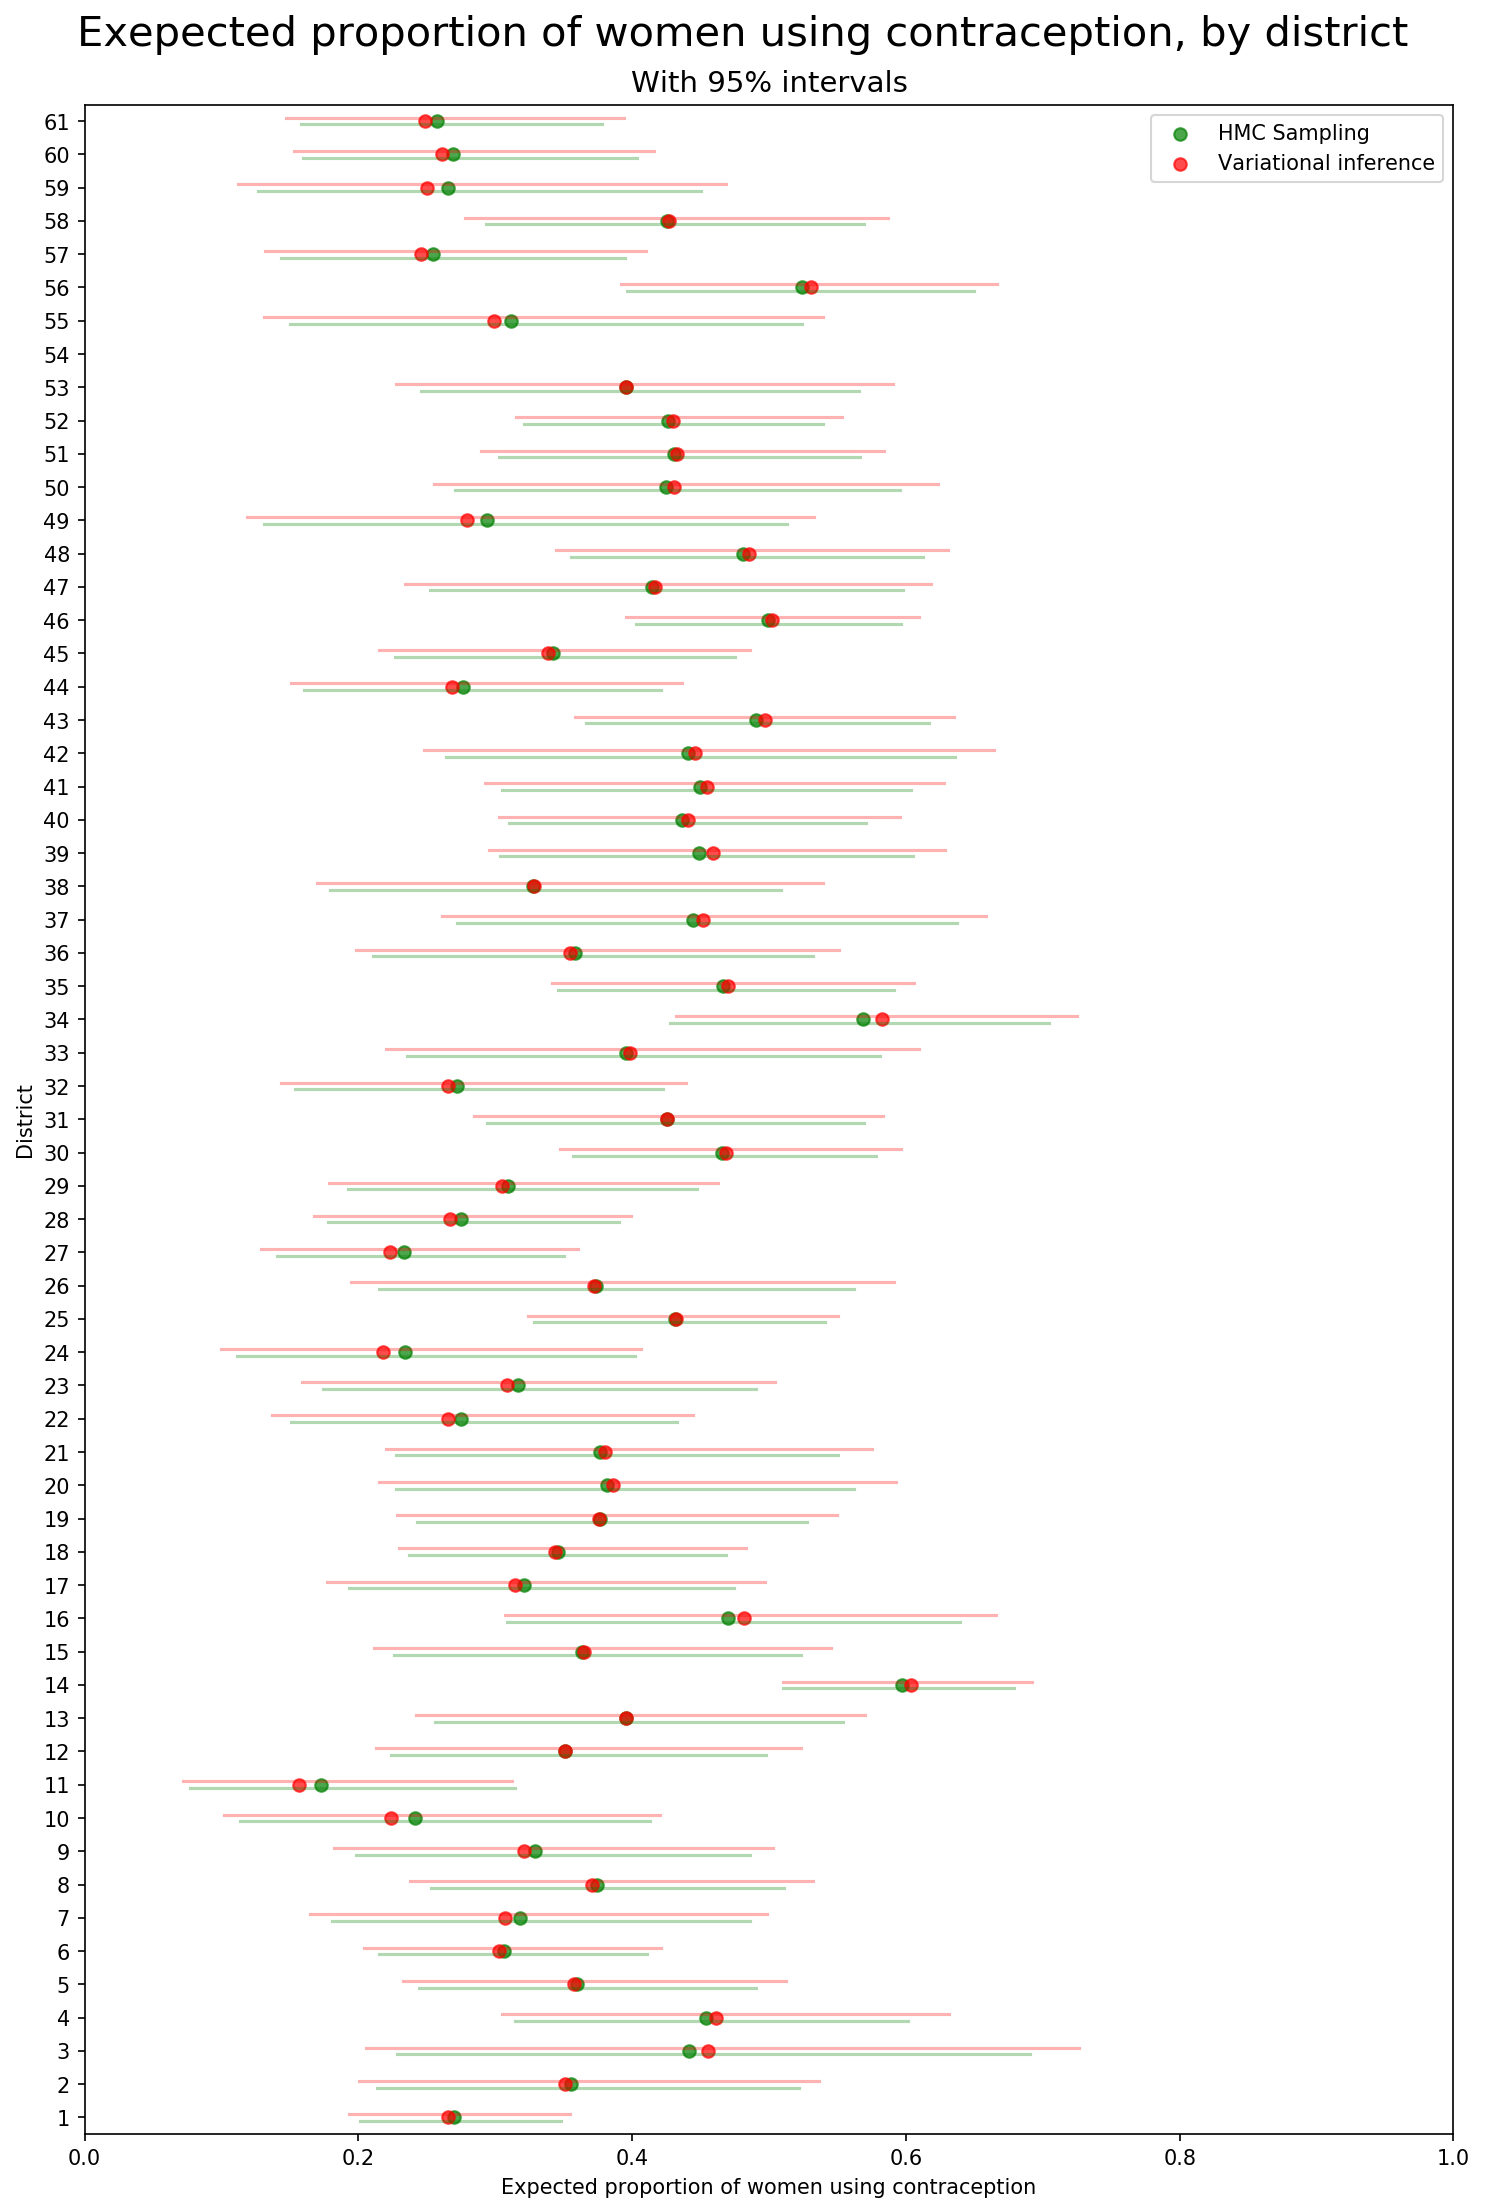

In [58]:
def invlogit(x):
    return np.exp(x) / (1 + np.exp(x))

# "Nicer" plot, generated manually.
# Also converts logits to probabilities for better interpretability.

plt.figure(figsize=(10, 15), dpi=150)

plt.yticks(range(1, nlevels+2))
plt.ylim((.5, nlevels+1.5))
plt.xlim((0,1))
plt.ylabel("District")
plt.xlabel("Expected proportion of women using contraception")

# Plot the HMC sampling estimates
p = trace_pp['a'].mean(axis=0)
p = invlogit(p)
plt.scatter(y=levels, 
            x=p,
            label="HMC Sampling",
            color='green', alpha=0.7)
# Plot their 95% confidence intervals
for i, d in enumerate(levels):
    try: p_d = trace_pp['a'][:, i]
    except Exception as e: print(e)
        
    p_d = invlogit(p_d)
    plt.plot([np.quantile(p_d, 0.025), np.quantile(p_d, 0.975)], [d-0.1]*2,
             color='green', alpha=0.3)
    
# Plot the variational inference with ADVI optimization estimates
p = advi_trace_pp['a'].mean(axis=0)
p = invlogit(p)
plt.scatter(y=levels, 
            x=p,
            label="Variational inference",
            color='red', alpha=0.7)
# Plot their 95% confidence intervals
for i, d in enumerate(levels):
    try: p_d = advi_trace_pp['a'][:, i]
    except: continue
        
    p_d = invlogit(p_d)
    plt.plot([np.quantile(p_d, 0.025), np.quantile(p_d, 0.975)], [d+0.1]*2,
             color='red', alpha=0.3)

plt.suptitle("Exepected proportion of women using contraception, by district", fontsize=20)
plt.title("With 95% intervals", fontsize=14)
plt.tight_layout()
plt.legend()
plt.subplots_adjust(top=0.94)
plt.show()

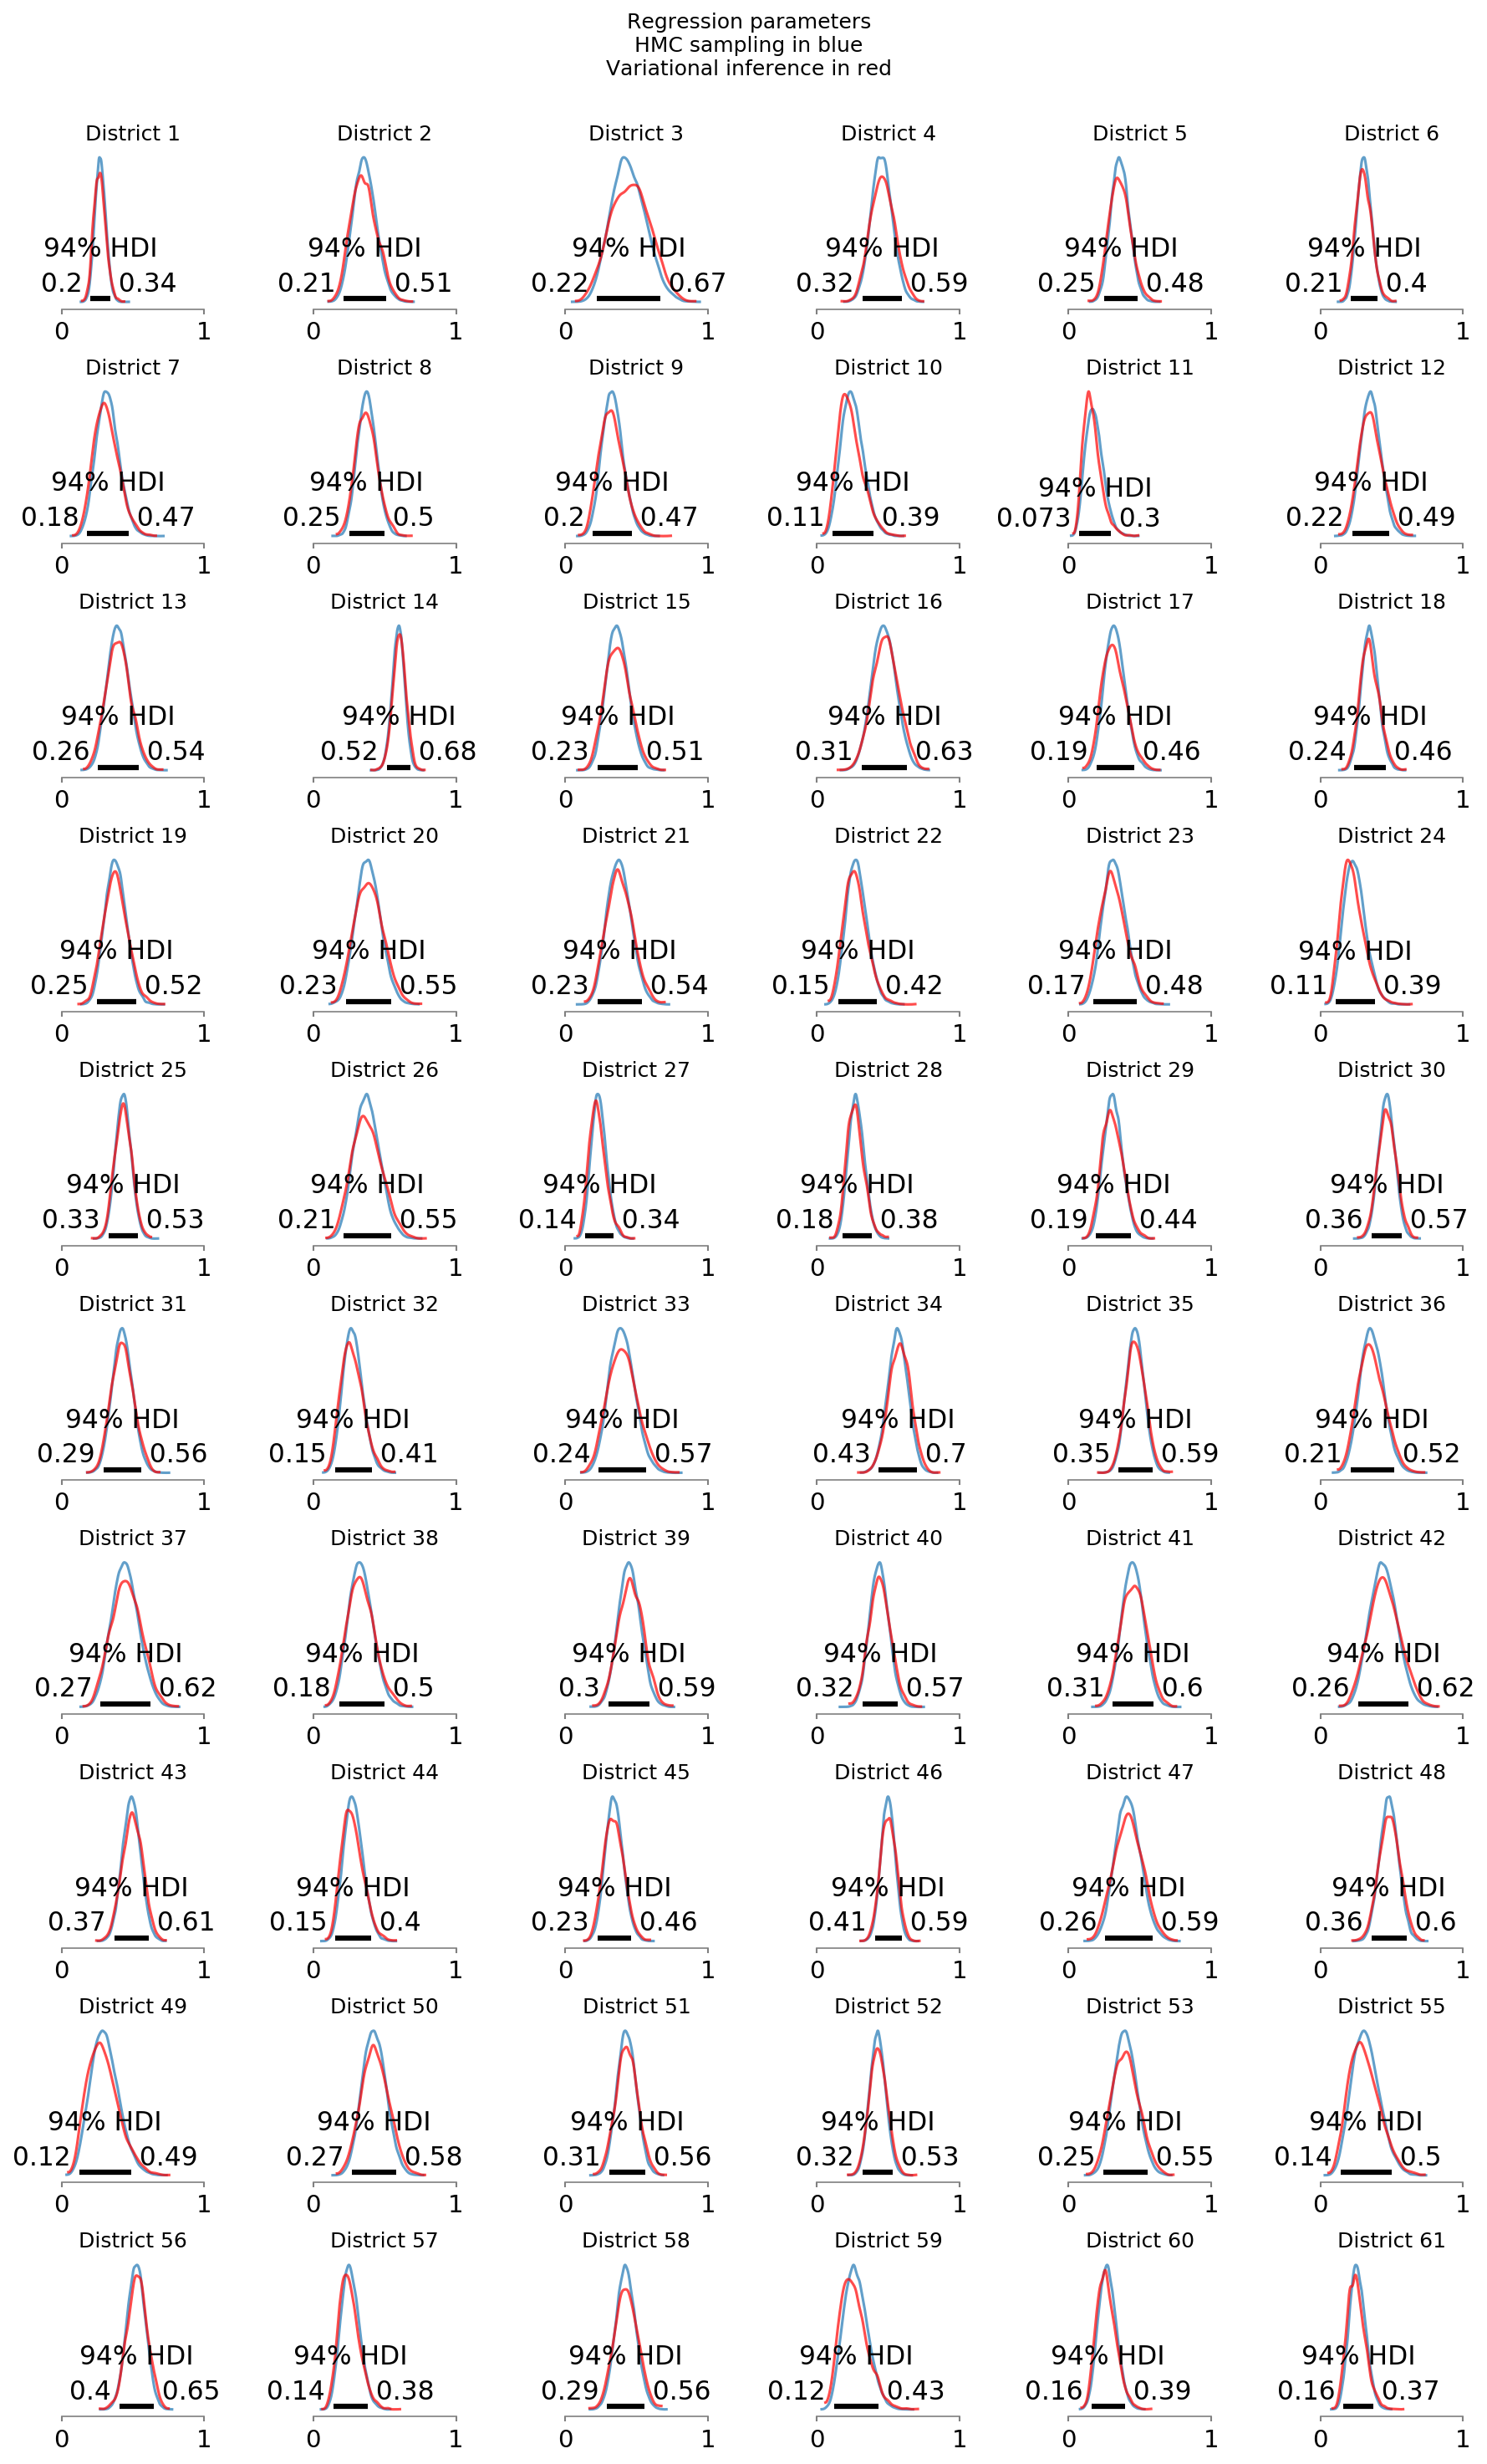

In [75]:
burnin = 100
sample_intercept = trace_pp['a'][burnin:]
advi_intercept = advi_trace_pp['a']

# Plot posteriors

fig, axes = plt.subplots(nrows=10, ncols=6, figsize=(12, 20), dpi=150, sharex=True)

for i, ax, level in zip(range(nlevels), axes.ravel(), sorted(levels)):

    try:
        #pm.plot_posterior(invlogit(sample_intercept[:, i]), ax=ax, point_estimate=None, credible_interval=None, alpha=0.7)
        #pm.plot_posterior(invlogit(advi_intercept[:, i]), ax=ax, color='red', point_estimate=None, credible_interval=None, alpha=0.7)
        pm.plot_posterior(invlogit(sample_intercept[:,i]), ax=ax,point_estimate=None,  alpha=0.7)
        pm.plot_posterior(invlogit(advi_intercept[:,i]), ax=ax, color='red', point_estimate=None, hdi_prob= 'hide', alpha=0.7)
        ax.set_title("District " + str(level), fontsize=12)
        #ax.set_xlabel("Contraception use", fontsize=12)
        ax.set_xlim((0,1))
        
    except IndexError: # one district is empty
        pass
    

plt.suptitle("Regression parameters\nHMC sampling in blue\nVariational inference in red")
plt.tight_layout()
plt.subplots_adjust(top=0.925)
plt.show()

# Comments on variational and sampling results (problem 5)
It can be seen from the forest plots, and more clearly from the side-by-side plot generated manually (HMC: green, variational inference: red), we can see that both methods give very similar results.  For every district, the expected proportion of women calculated by each method is very similar, and the credible intervals always mostly overlap. 

It is also shown that the variational inference tends to produce posterior distributions with slightly wider spread (slightly wider credibility intervals), and the HMC estimates tend to be slightly closer to the fully pooled estimate (a proportion around 0.4, as found in the previous homework).

This can also be seen in the posterior distributions plotted directly (blue and red curves, immediately above this comment). The variational inference posteriors with ADVI optimization (red) are very close to the HMC-sampled curves, but with slightly wider spread. Their maxima are slightly further from 0.4, compared to HMC.

## Problem 5 with full Hierarchical Model

In [61]:
# Load data

path = "/Users/donaldbrown/Dropbox/department/Classes/Data/"
file = "bangladesh.csv"
data = pd.read_csv(path+file)
# Predictor variables
age = data['age.centered']
contraception = data['use.contraception']
# grouping or hierarchical variable
districts = data['district'].unique()
ndistricts = len(districts)

# lookup table (dict) for each district
district_lookup = dict(zip(districts, range(ndistricts)))
district  = data["district_code"] = data.district.replace(district_lookup).values

In [64]:
with pm.Model() as hierarchical_model:

    # Priors for the model parameters
    # Gaussians for the means of the priors of the random intercepts and slopes
    mu_a = pm.Normal('mu_a', mu=0., sd=1e5)
    mu_b = pm.Normal('mu_b', mu=0., sd=1e5)
    
    # Half-Cauchy for the standard deviations of the priors 
    # of the random intercepts and slopes
    sigma_a =  pm.HalfCauchy('sigma_a', 1e5)
    sigma_b =  pm.HalfCauchy('sigma_b', 1e5)

    # Gaussian priors for random intercepts and slopes
    a = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=ndistricts)
    b = pm.Normal('b', mu=mu_b, sd=sigma_b, shape=ndistricts)
    
    # Linear model
    μ = a[district] + b[district]*age
    
    # Transform outcome to probability
    θ = pm.Deterministic('θ', pm.invlogit(μ))
    y_hat = pm.Bernoulli('y_hat', p=θ, observed=contraception)
    
    # Sample the posterior
    hierarchical_trace = pm.sample(draws=1000, step=pm.NUTS(target_accept=0.99), tune=10000)



Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a, sigma_b, sigma_a, mu_b, mu_a]


Sampling 4 chains for 10_000 tune and 1_000 draw iterations (40_000 + 4_000 draws total) took 547 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9709728701893411, but should be close to 0.99. Try to increase the number of tuning steps.
There were 30 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9132965957316718, but should be close to 0.99. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [68]:
with pm.Model() as advi_hierarchical_model:

    # Priors for the model parameters
    # Gaussians for the means of the priors of the random intercepts and slopes
    mu_a = pm.Normal('mu_a', mu=0., sd=1e5)
    mu_b = pm.Normal('mu_b', mu=0., sd=1e5)
    
    # Half-Cauchy for the standard deviations of the priors 
    # of the random intercepts and slopes
    sigma_a =  pm.HalfCauchy('sigma_a', 1e5)
    sigma_b =  pm.HalfCauchy('sigma_b', 1e5)

    # Gaussian priors for random intercepts and slopes
    a = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=ndistricts)
    b = pm.Normal('b', mu=mu_b, sd=sigma_b, shape=ndistricts)
    
    # Linear model
    μ = a[district] + b[district]*age
    
    # Transform outcome to probability
    θ = pm.Deterministic('θ', pm.invlogit(μ))
    y_hat = pm.Bernoulli('y_hat', p=θ, observed=contraception)
    
    # Sample the posterior
    advi_hierarchical_fit = pm.fit(50000, method='advi')



Finished [100%]: Average Loss = 1,592.4


In [89]:
# sample from the variational posterior distribution
PPC_SAMPLES = 5000
advi_trace_hierarchical = advi_hierarchical_fit.sample(PPC_SAMPLES)

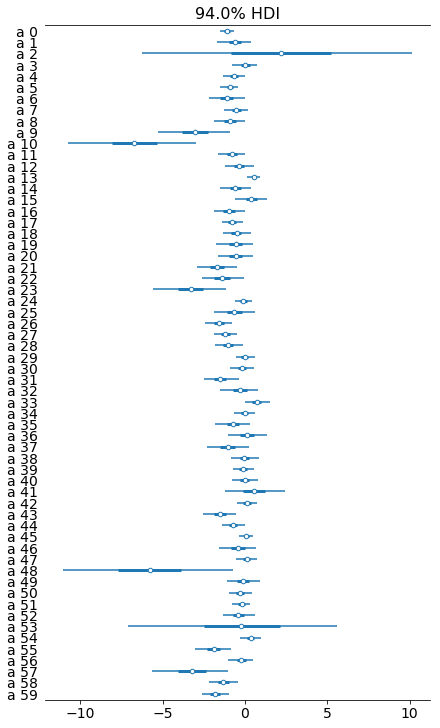

In [90]:
# Forest plots (logit, not probabilities):
# Variational inference with ADVI

with advi_hierarchical_model:
    pm.forestplot(advi_trace_hierarchical, var_names=['a'])

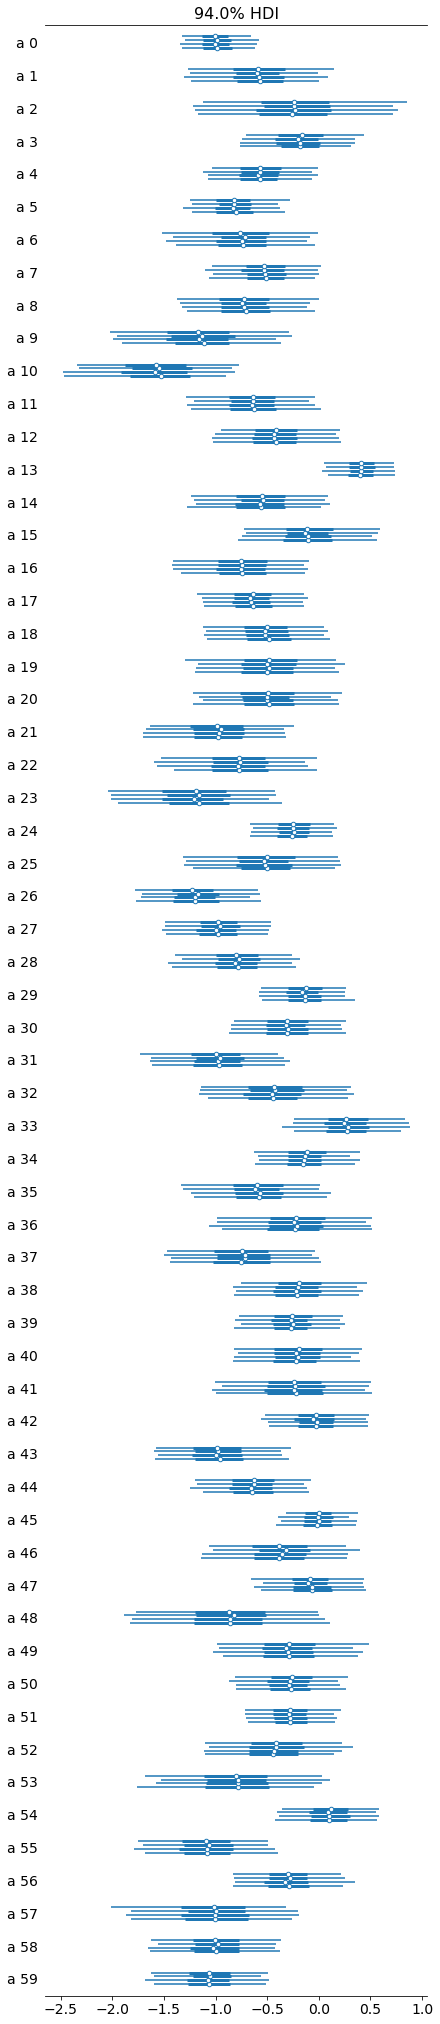

In [93]:
with hierarchical_model:
    pm.forestplot(hierarchical_trace, var_names=['a'])

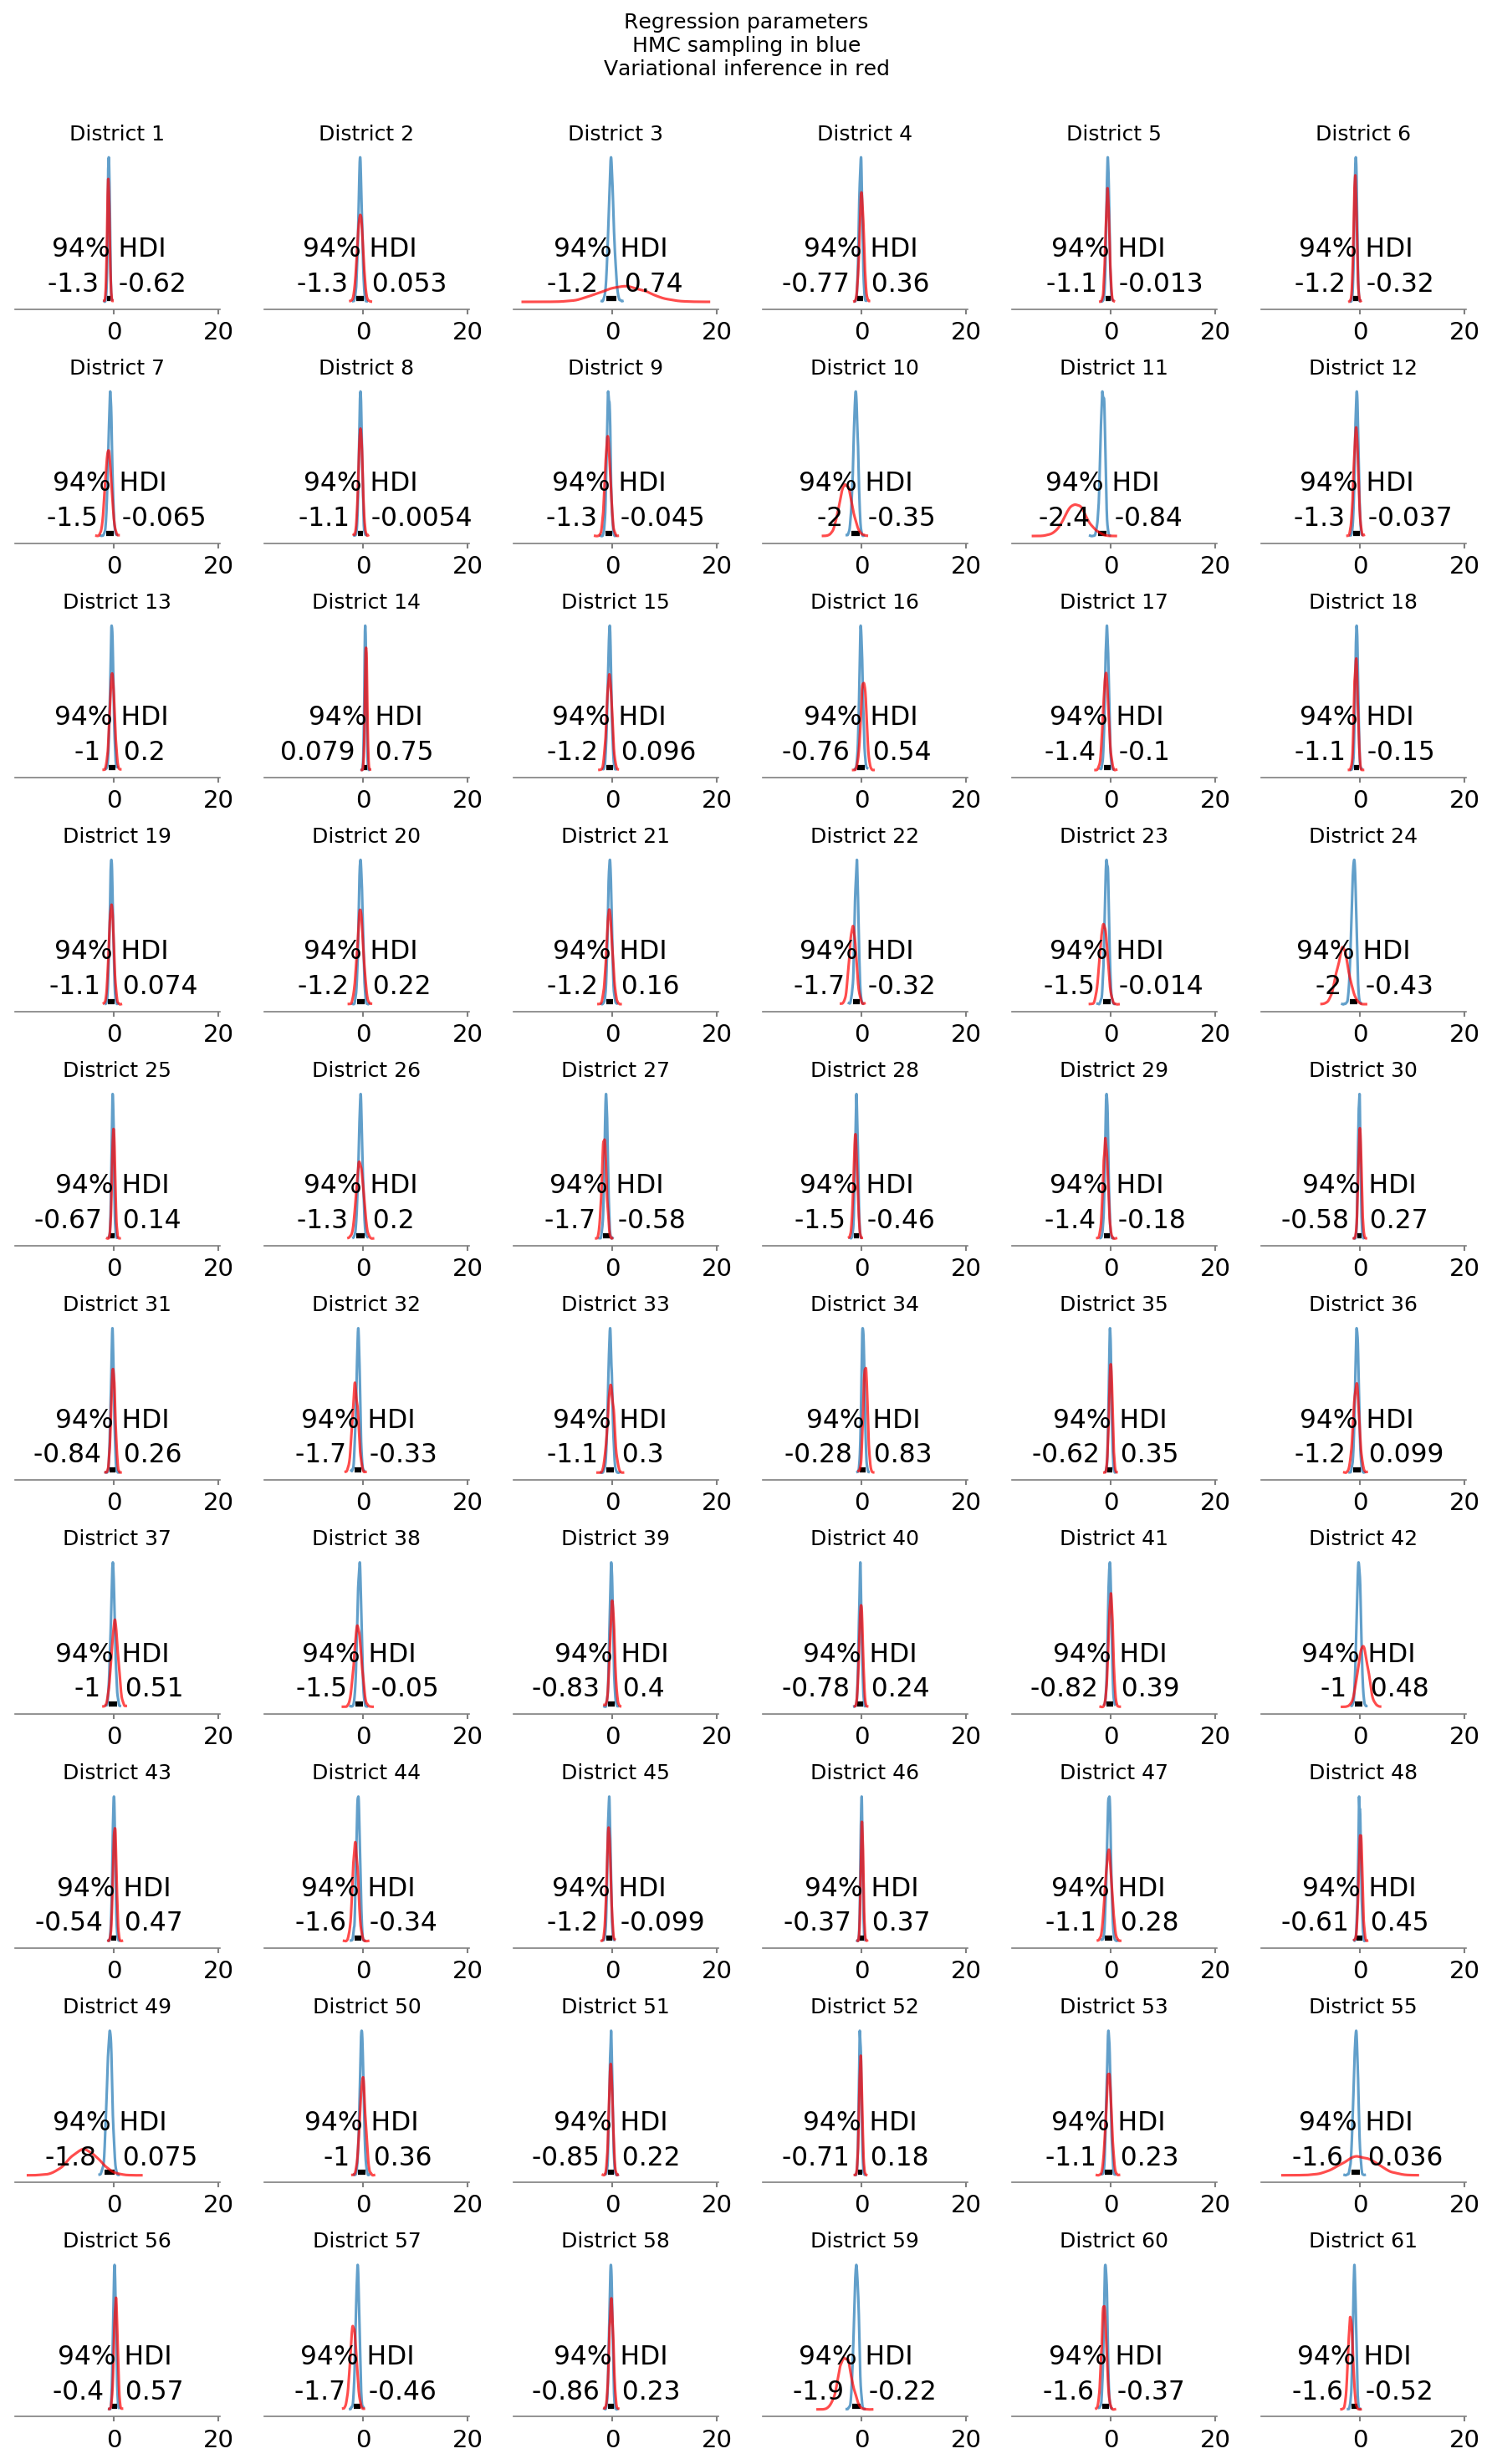

In [109]:
# Comparison Plots

burnin = 100
sample_intercept = hierarchical_trace['a'][burnin:]
advi_intercept = advi_trace_hierarchical['a']

# Plot posterior logits (not probabilities)


fig, axes = plt.subplots(nrows=10, ncols=6, figsize=(12, 20), dpi=150, sharex=True)

for i, ax, level in zip(range(nlevels), axes.ravel(), sorted(levels)):
    pm.plot_posterior(sample_intercept[:,i], ax=ax, point_estimate=None,  alpha=0.7)
    pm.plot_posterior(advi_intercept[:,i], ax=ax, color='red', point_estimate=None, hdi_prob= 'hide', alpha=0.7)
    ax.set_title("District " + str(level), fontsize=12)
    
plt.suptitle("Regression parameters\nHMC sampling in blue\nVariational inference in red")
plt.tight_layout()
plt.subplots_adjust(top=0.925)
plt.show()

# Comments on variational and sampling results (problem 5 with hiearchical models)
It can be seen from the forest plots and also with the posterior plots that the two methods are close for some distribicts and quite different for others. The variational results in some cases  produce posterior distributions with wider spread (and wider credibility intervals). In a few cases the means of the distributions are different. So the variational methods with a hierarchical model are more impacted by the sizes of the districts. 
